In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# Any results you write to the current directory are saved as output.

/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json
/kaggle/input/sarcasm/Sarcasm_Headlines_Dataset_v2.json


In [2]:
data_path = '../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json'

In [3]:
df=pd.read_json(data_path,lines=True)
print(df.head())

   is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...  


In [4]:
sentences = df['headline'].to_list()
labels = df['is_sarcastic'].to_list()
urls = df['article_link'].to_list()

print(sentences)

['thirtysomething scientists unveil doomsday clock of hair loss', 'dem rep. totally nails why congress is falling short on gender, racial equality', 'eat your veggies: 9 deliciously different recipes', 'inclement weather prevents liar from getting to work', "mother comes pretty close to using word 'streaming' correctly", 'my white inheritance', '5 ways to file your taxes with less stress', "richard branson's global-warming donation nearly as much as cost of failed balloon trips", 'shadow government getting too large to meet in marriott conference room b', 'lots of parents know this scenario', 'this lesbian is considered a father in indiana (and an amazing one at that)', "amanda peet told her daughter sex is 'a special hug'", 'what to know regarding current treatments for ebola', "chris christie suggests hillary clinton was to blame for boko haram's kidnapping of hundreds of schoolgirls", 'ford develops new suv that runs purely on gasoline', 'uber ceo travis kalanick stepping down from 

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token="<OOV>")

tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

print(sequences)


[[16004, 355, 3167, 7474, 2644, 3, 661, 1119], [7475, 1775, 758, 3168, 47, 239, 11, 1844, 1048, 8, 1528, 2154, 1845], [863, 33, 11427, 262, 16005, 647, 1484], [11428, 1594, 6418, 5665, 16, 143, 2, 152], [472, 495, 322, 922, 2, 572, 550, 16006, 6419], [83, 73, 11429], [84, 280, 2, 4182, 33, 2515, 10, 573, 1356], [1846, 16007, 777, 5063, 3169, 1120, 25, 227, 25, 1433, 3, 1434, 3359, 4183], [2961, 292, 143, 139, 1709, 2, 425, 5, 16008, 1595, 356, 1357], [2792, 3, 160, 115, 21, 7476], [21, 2645, 11, 3360, 7, 426, 5, 3580, 9, 69, 1006, 43, 15, 26], [7477, 11430, 648, 60, 536, 201, 11, 1358, 626, 16009], [35, 2, 115, 11431, 1710, 11432, 6, 1049], [574, 1596, 953, 149, 85, 76, 2, 1776, 6, 9021, 16010, 7478, 3, 1149, 3, 11433], [1529, 4184, 12, 6420, 26, 1530, 11434, 8, 9022], [1318, 379, 7479, 9023, 5064, 80, 16, 13, 1711, 7480, 2155], [50, 433, 1150, 5666, 9, 2156, 2793, 3, 16011, 3361], [50, 14, 323, 100, 3, 31, 2261, 18, 11435], [537, 59, 411, 10, 3362, 343], [3363, 3581, 2962, 98, 58, 2, 

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_seq = pad_sequences(sequences)

print(padded_seq)

[[    0     0     0 ...     3   661  1119]
 [    0     0     0 ...  1528  2154  1845]
 [    0     0     0 ... 16005   647  1484]
 ...
 [    0     0     0 ...     7   843  1924]
 [    0     0     0 ...  2360   838  6296]
 [    0     0     0 ...     7   260   178]]


In [7]:
vocab_size = 10000
embedding_dim = 16
max_length = 21
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [8]:
training_sentences = np.array(sentences[0:training_size])
testing_sentences = np.array(sentences[training_size:])
training_labels = np.array(labels[0:training_size])
testing_labels = np.array(labels[training_size:])

In [9]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

testing_sequence = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequence,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(21,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')  
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 21, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 21)                357       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 22        
Total params: 160,379
Trainable params: 160,379
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

num_epochs = 10

In [13]:
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded,testing_labels),verbose=2)

Train on 20000 samples, validate on 8619 samples
Epoch 1/10
20000/20000 - 3s - loss: 0.5178 - accuracy: 0.7497 - val_loss: 0.3571 - val_accuracy: 0.8473
Epoch 2/10
20000/20000 - 2s - loss: 0.2886 - accuracy: 0.8820 - val_loss: 0.3309 - val_accuracy: 0.8502
Epoch 3/10
20000/20000 - 2s - loss: 0.2167 - accuracy: 0.9172 - val_loss: 0.3404 - val_accuracy: 0.8531
Epoch 4/10
20000/20000 - 2s - loss: 0.1733 - accuracy: 0.9366 - val_loss: 0.3673 - val_accuracy: 0.8494
Epoch 5/10
20000/20000 - 2s - loss: 0.1420 - accuracy: 0.9498 - val_loss: 0.4077 - val_accuracy: 0.8405
Epoch 6/10
20000/20000 - 2s - loss: 0.1199 - accuracy: 0.9581 - val_loss: 0.4598 - val_accuracy: 0.8334
Epoch 7/10
20000/20000 - 2s - loss: 0.1016 - accuracy: 0.9649 - val_loss: 0.5181 - val_accuracy: 0.8264
Epoch 8/10
20000/20000 - 2s - loss: 0.0862 - accuracy: 0.9722 - val_loss: 0.5684 - val_accuracy: 0.8214
Epoch 9/10
20000/20000 - 2s - loss: 0.0744 - accuracy: 0.9762 - val_loss: 0.6116 - val_accuracy: 0.8221
Epoch 10/10
200

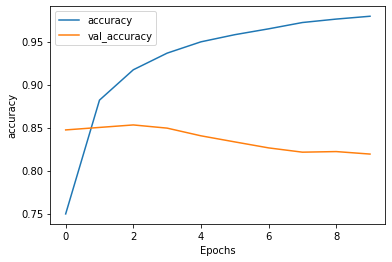

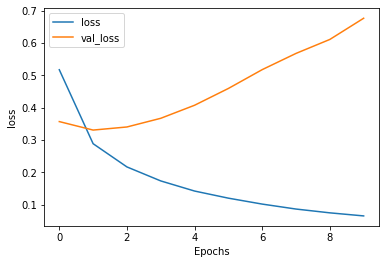

In [14]:
import matplotlib.pyplot as plt

def plot_graphs(history, value):
    plt.plot(history.history[value])
    plt.plot(history.history['val_'+value])
    plt.xlabel('Epochs')
    plt.ylabel(value)
    plt.legend([value,'val_'+value])
    plt.show()

plot_graphs(history,'accuracy')
plot_graphs(history,'loss')